# Four Decades of Movies
### Looking for Correlations

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

movies = pd.read_csv('/Users/Natalie/DataScience/Movies.csv')

In [71]:
# Looking for missing values and determining total number of data values per column

print("Dataframe: ",movies.shape)
print(movies.count())

# Looking for the numbber of missing values per column

print("\n")
for col in movies.columns:
    num_missing = np.mean(movies[col].isnull().sum())
    print(col, " ", num_missing)
    
# Removing columns with missing data

movies = movies.dropna()

Dataframe:  (7668, 15)
name        7668
rating      7591
genre       7668
year        7668
released    7666
score       7665
votes       7665
director    7668
writer      7665
star        7667
country     7665
budget      5497
gross       7479
company     7651
runtime     7664
dtype: int64


name   0.0
rating   77.0
genre   0.0
year   0.0
released   2.0
score   3.0
votes   3.0
director   0.0
writer   3.0
star   1.0
country   3.0
budget   2171.0
gross   189.0
company   17.0
runtime   4.0


In [72]:
# Checking the datatype of each column

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [73]:
# Changing votes, runtime, budget, and gross to integers to remove the decimals with 0 after them

movies['budget'] = movies['budget'].astype('int64')
movies['votes'] = movies['votes'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')
movies['runtime'] = movies['runtime'].astype('int64')

In [74]:
# Extracting the year from the released column

movies['correctyear'] = movies['released'].astype(str).str.split().str[2]


In [75]:
# Sorting by gross earnings in descending order

movies = movies.sort_values(by=['gross'], inplace=False, ascending=False)

# To view the entire dataset,

pd.set_option('display.max_rows', None)

In [89]:
# Dropping duplicates

movies.drop_duplicates()
movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## Hypotheses:
* Budget will be highly correlated with gross earnings
* Company will be highly correlated with gross earnings
* I initially thought that score will be highly correlated with gross earnings, but scatterplot showed that this is wrong

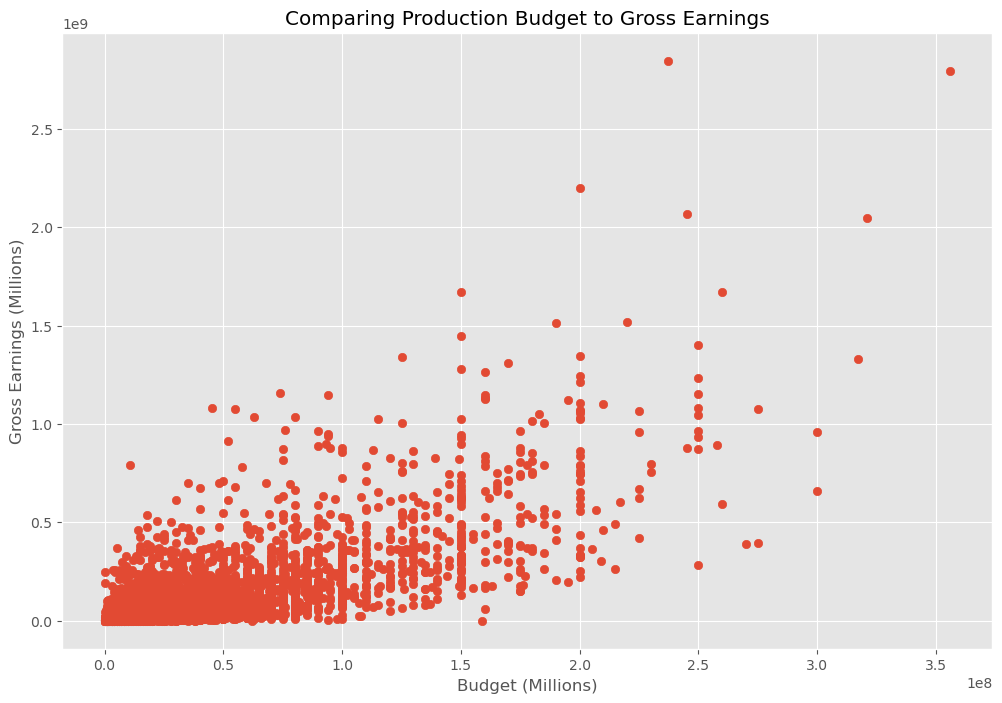

In [77]:
# Plot the Budget against Gross earnings

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Comparing Production Budget to Gross Earnings')
plt.xlabel('Budget (Millions)')
plt.ylabel('Gross Earnings (Millions)')
plt.show()

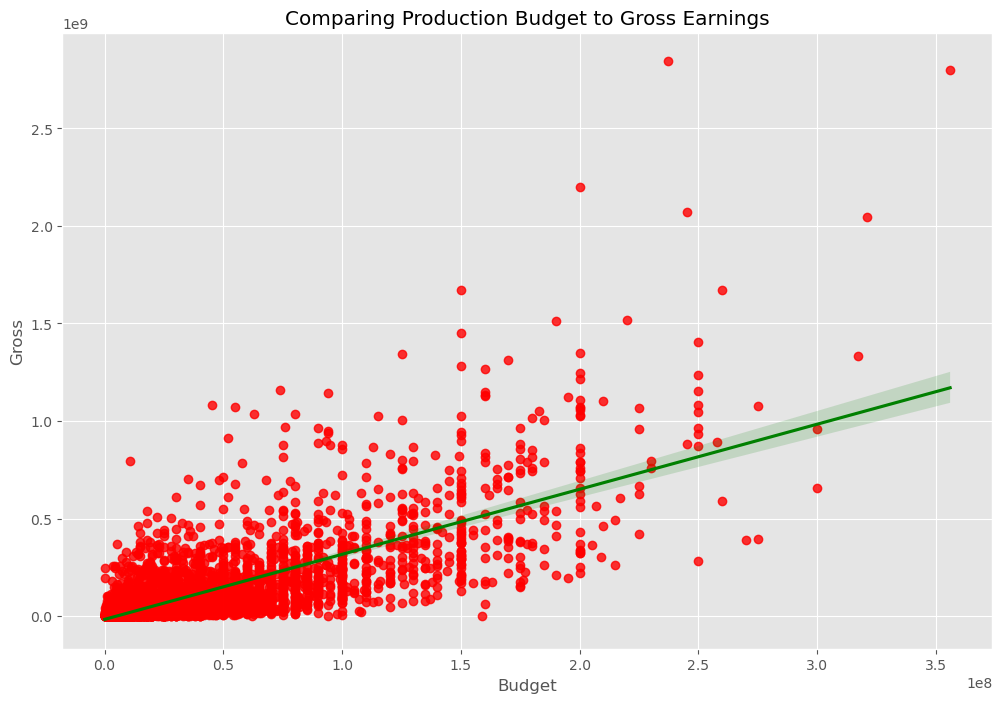

In [78]:
# Using a linear regression plot to find out the correlation
# Plotting budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={'color':'red'}, line_kws={'color':'green'})

plt.title("Comparing Production Budget to Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [79]:
# Using a table to find out the correlation
# Methods: pearson (default), kendall, and spearman

movies.corr(numeric_only = True, method="pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


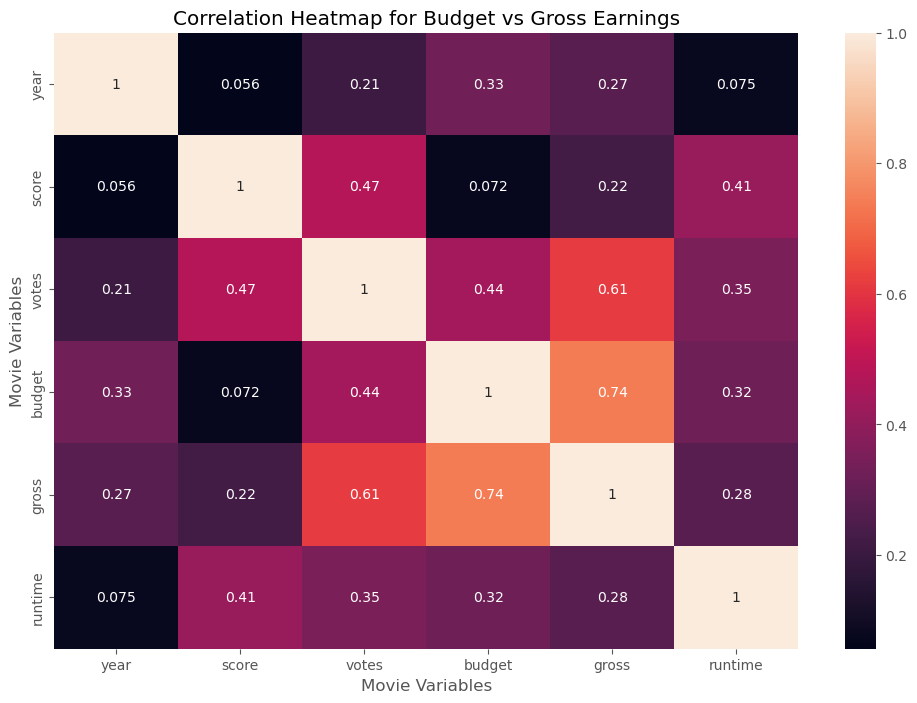

In [80]:
correlationMatrix = movies.corr(numeric_only = True)

sns.heatmap(correlationMatrix, annot=True)

plt.title("Correlation Heatmap for Budget vs Gross Earnings")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")
plt.show()

## Observations so far
* Budget and gross are highly correlated variables
* The budget/gross scatter plot suggests that films underperform on average. Their budget is generally higheer than their gross earning.
* Votes and gross are also correlated
### There are also some variables that have little to no correlation:
* Year and runtime
* Budget and score

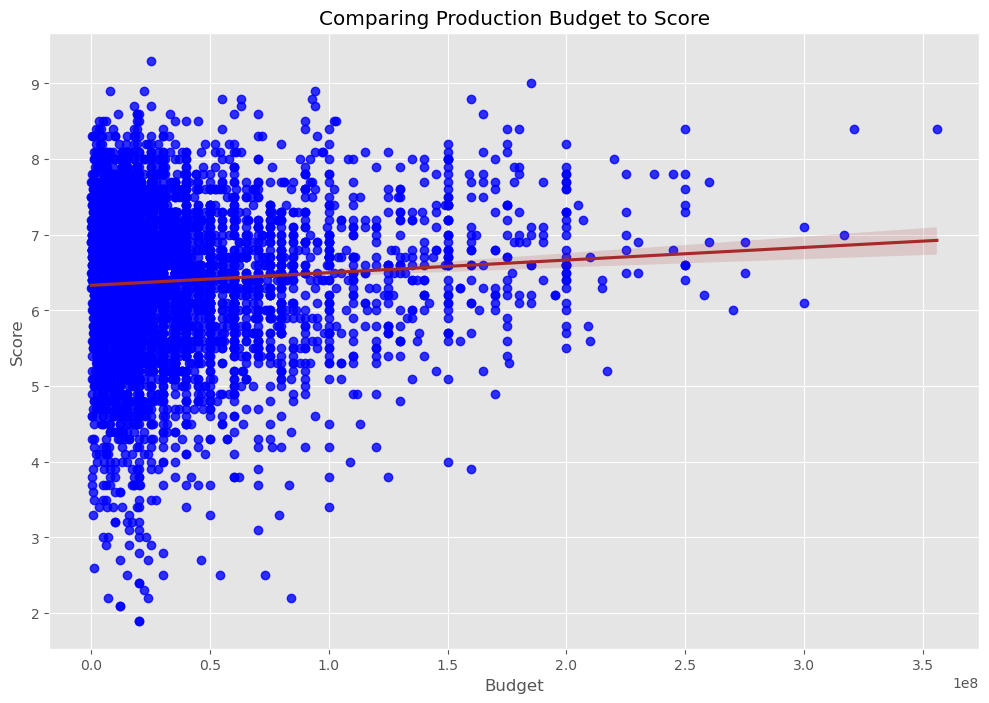

In [81]:
# Exploring the correlation between budget and score in more detail
# Plotting budget and score: 

sns.regplot(x='budget', y='score', data=movies, scatter_kws={'color':'blue'}, line_kws={'color':'brown'})
plt.title("Comparing Production Budget to Score")
plt.xlabel("Budget")
plt.ylabel("Score")
plt.show()

## Conclusions on Budget vs Score
* The budget does not always indicate the quality of a movie: Many low-budget productions receive high scores
* Once the budget surpasses 2 million, score is always above 5, which indicates that a high budget has a slight influence on score
* Significant variations between films of the same budgets. This is most visible when viewing the vertical clusters at exactly 1, 1.5, and 2 million budget films

### What next?
* The current heatmap compared numerical variables. What if some of the other datatype variables are correlated?
* For example: Could company be correlated with gross earnings?

In [82]:
# Checking if company is correlated with gross
# Necessary to first categorize non-numerical categories (company, country, etc.) into numbers

moviesNum = movies

moviesNum = moviesNum.sort_values(by=['gross'], inplace=False, ascending=False)

# Assigning an index to each numerical data value

for col in moviesNum:
    if (moviesNum[col].dtype == object):
        moviesNum[col] = moviesNum[col].astype("category")
        moviesNum[col] = moviesNum[col].cat.codes

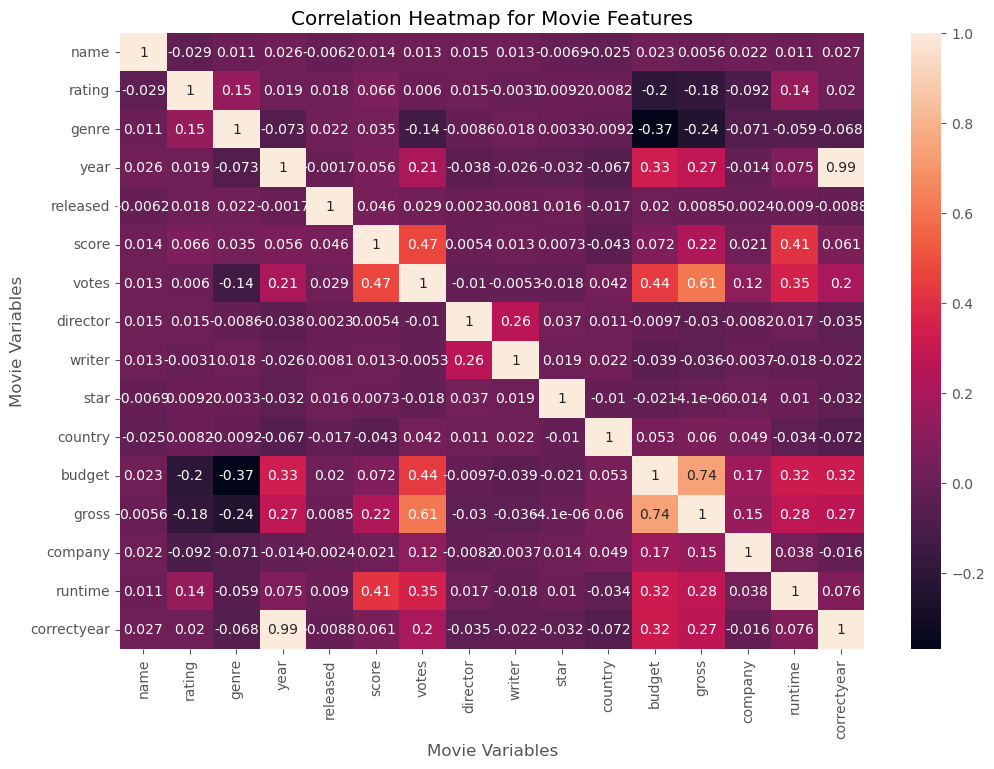

In [83]:
# Creating a second heatmap to compare all the columns in the copied dataset

correlationMatrix2 = moviesNum.corr()

sns.heatmap(correlationMatrix2, annot=True)

plt.title("Correlation Heatmap for Movie Features")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")
plt.show()

## Observations from Heatmap 2
* Company and gross seem to have no correlation
* That portion of my hypothesis was wrong

In [84]:
sortedPairs = correlationMatrix2.unstack().sort_values()

corrPairs = sortedPairs[sortedPairs > 0.5]
corrPairs = corrPairs[corrPairs < 1]
corrPairs

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
correctyear  year           0.994821
year         correctyear    0.994821
dtype: float64

In [85]:
# Adjusting one more time to get rid of year/correctyear

corrPairs = corrPairs[corrPairs < 0.994821]
corrPairs

votes   gross     0.614751
gross   votes     0.614751
        budget    0.740247
budget  gross     0.740247
dtype: float64

## Final Conclusions
* A high film budget typically correlates with high gross earnings
    * However, budget typically exceeds the gross revenue
    * This indicates risk when choosing a budget
* Votes and gross are also correlated
    * Suggests that movies make more money when there is more discourse about them
* Budget and score have no correlation
    * Therefore, a high budget does not guarantee a high-scoring film